## Parte 1 - Pima Indians Diabetes

#### 1.1 Carregamento do conjunto de dados

In [72]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

pima_df = pd.read_csv('diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1.2 Exploração inicial dos dados

In [73]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 1.3 Análise univariada

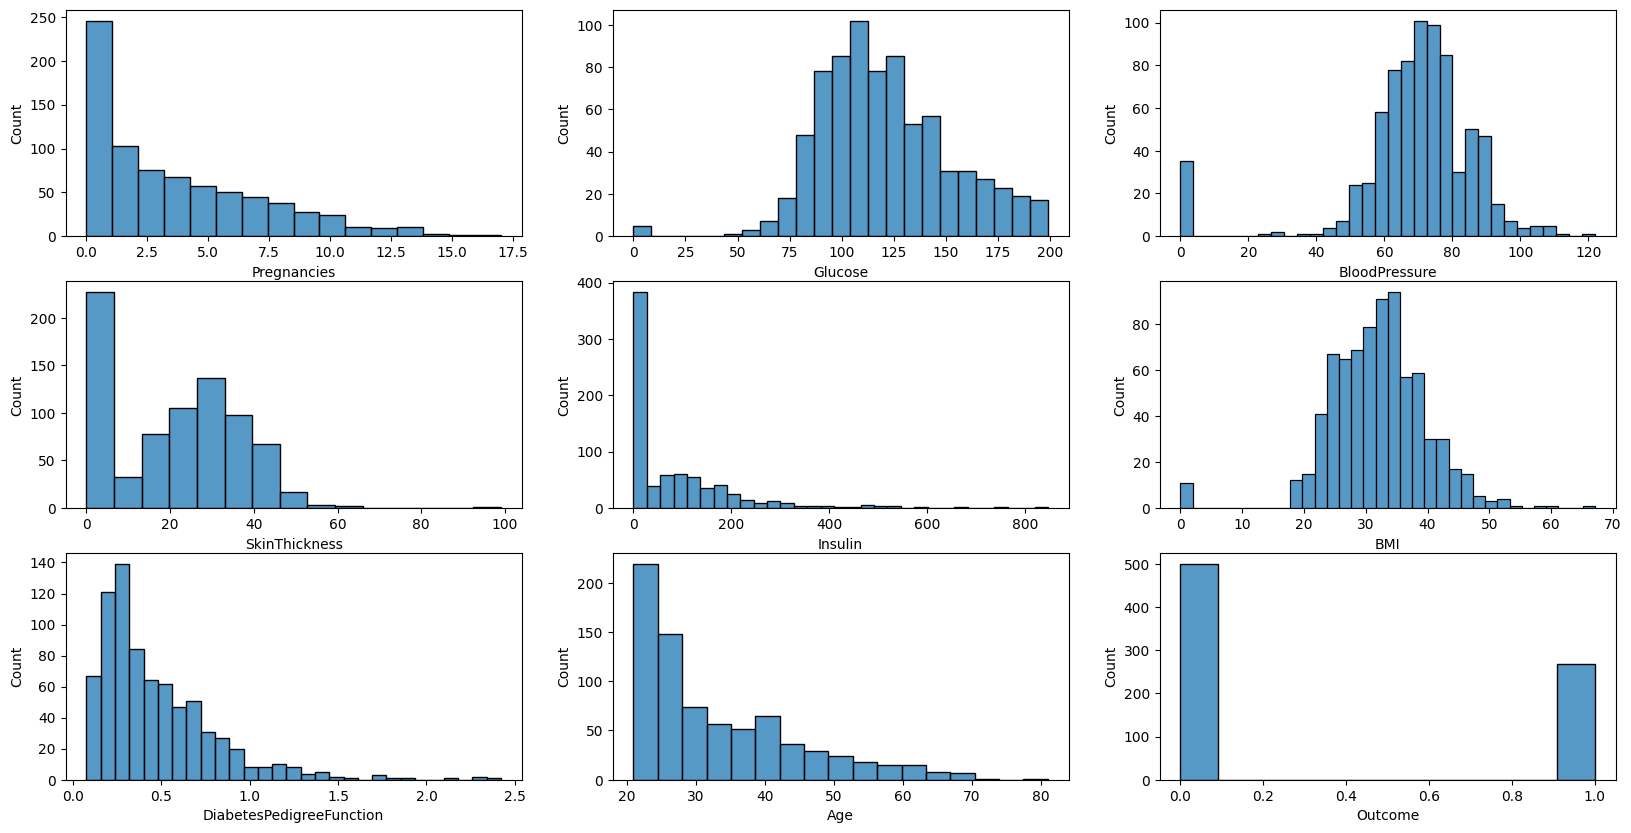

In [75]:
# Distribuição das Variáveis:
'''
    Algumas coisas interessantes que podem ser vistas abaixo: 
    - algumas mulheres ficaram grávidas mais de 10 vezes
    - a maioria das pessoas do dataset tem entre 20 e 40 anos
    - o dataset está desbalanceado, porque mais ou menos metade das pessoas tem diabetes
'''
plt.figure(figsize=(20, 10))

numeric_variables = pima_df.select_dtypes(include=[np.number])

for index, var in enumerate(numeric_variables):
    plt.subplot(3, 3, index+1)
    sns.histplot(pima_df[var])
    
plt.show()

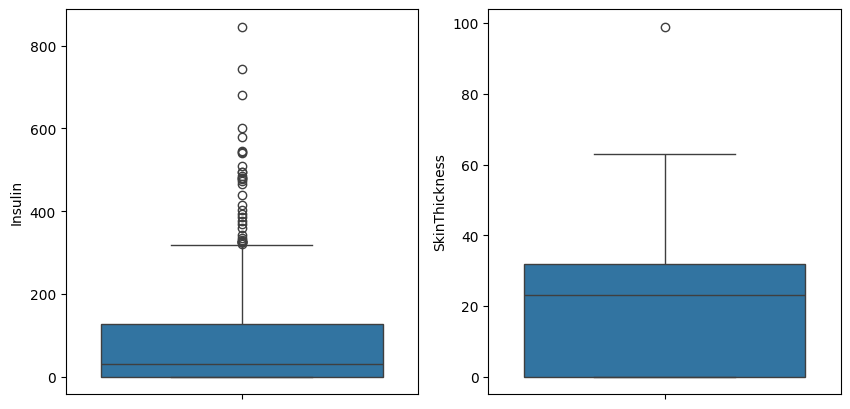

In [76]:
# Análise de Outliers:
'''
    - A variável Insulin tem muitos outliers
    - O boxplot do SkinThickness mostra apenas um outlier
'''
plt.figure(figsize=(10, 5))

outliers_analisys = pima_df[['Insulin', 'SkinThickness']]

for index, column in enumerate(outliers_analisys):
    plt.subplot(1, 2, index+1)
    sns.boxplot(y=pima_df[column])

plt.show()

#### 1.4 Análise bivariada

<Axes: >

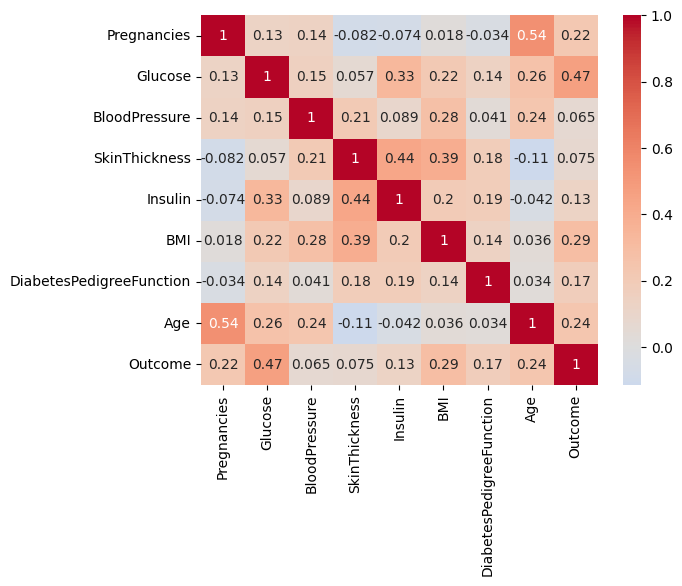

In [77]:
# Correlação entre variáveis:
'''
    As variáveis que tem maior correlação entre si são:
    - Pregnancies e Age
    - Glucose e Outcome
    - SkinThickness e Insulin
    - SkinThickness e BMI
'''
correlation_matrix_df = pima_df.corr()
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', center=0)

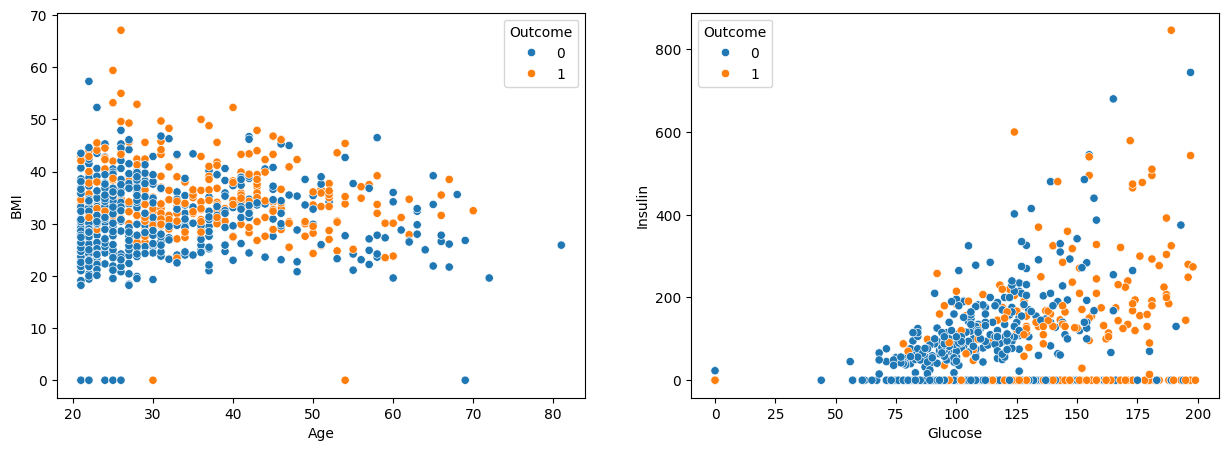

In [78]:
# Gráficos de Dispersão:
'''
    - A variável BMI parece ter mais impacto na variável Outcome do que a variável Age
    - A variável Glucose parece ter mais impacto na variável Outcome do que a variável Insulin
'''
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=pima_df)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=pima_df)
plt.show()

<Axes: xlabel='Outcome', ylabel='Glucose'>

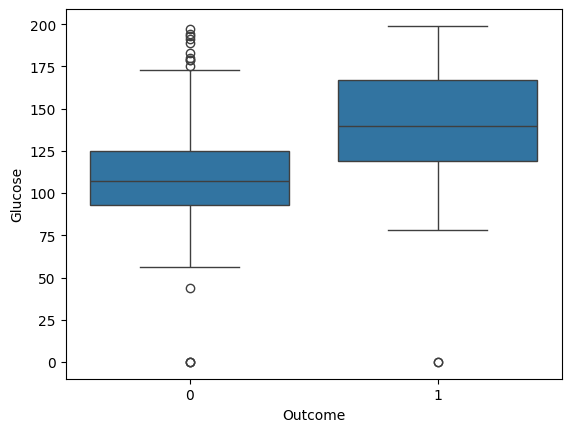

In [79]:
#  Faça um boxplot da variável Glucose para cada categoria da variável Outcome:
'''
    - A mediana da variável Glucose é maior para pessoas que tem diabetes
    - A variável Glucose tem mais outliers para pessoas que não tem diabetes 
    (É possível ver que há pessoas com taxa bem alta de glicose que não tem diabetes)
'''
sns.boxplot(x='Outcome', y='Glucose', data=pima_df)

#### 1.5 Análise de variáveis categóricas

<Axes: xlabel='Outcome', ylabel='count'>

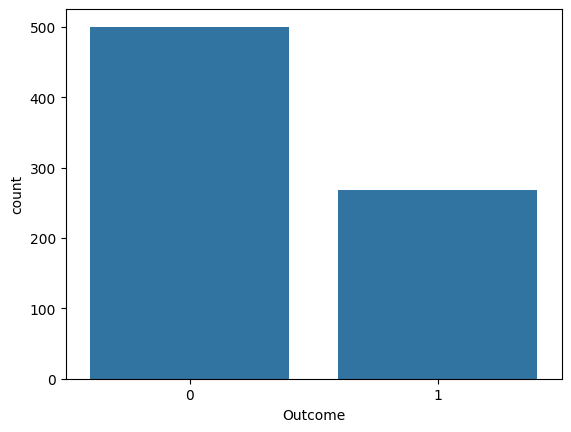

In [80]:
#  Distribuição da Variável Alvo:
sns.countplot(x='Outcome', data=pima_df)

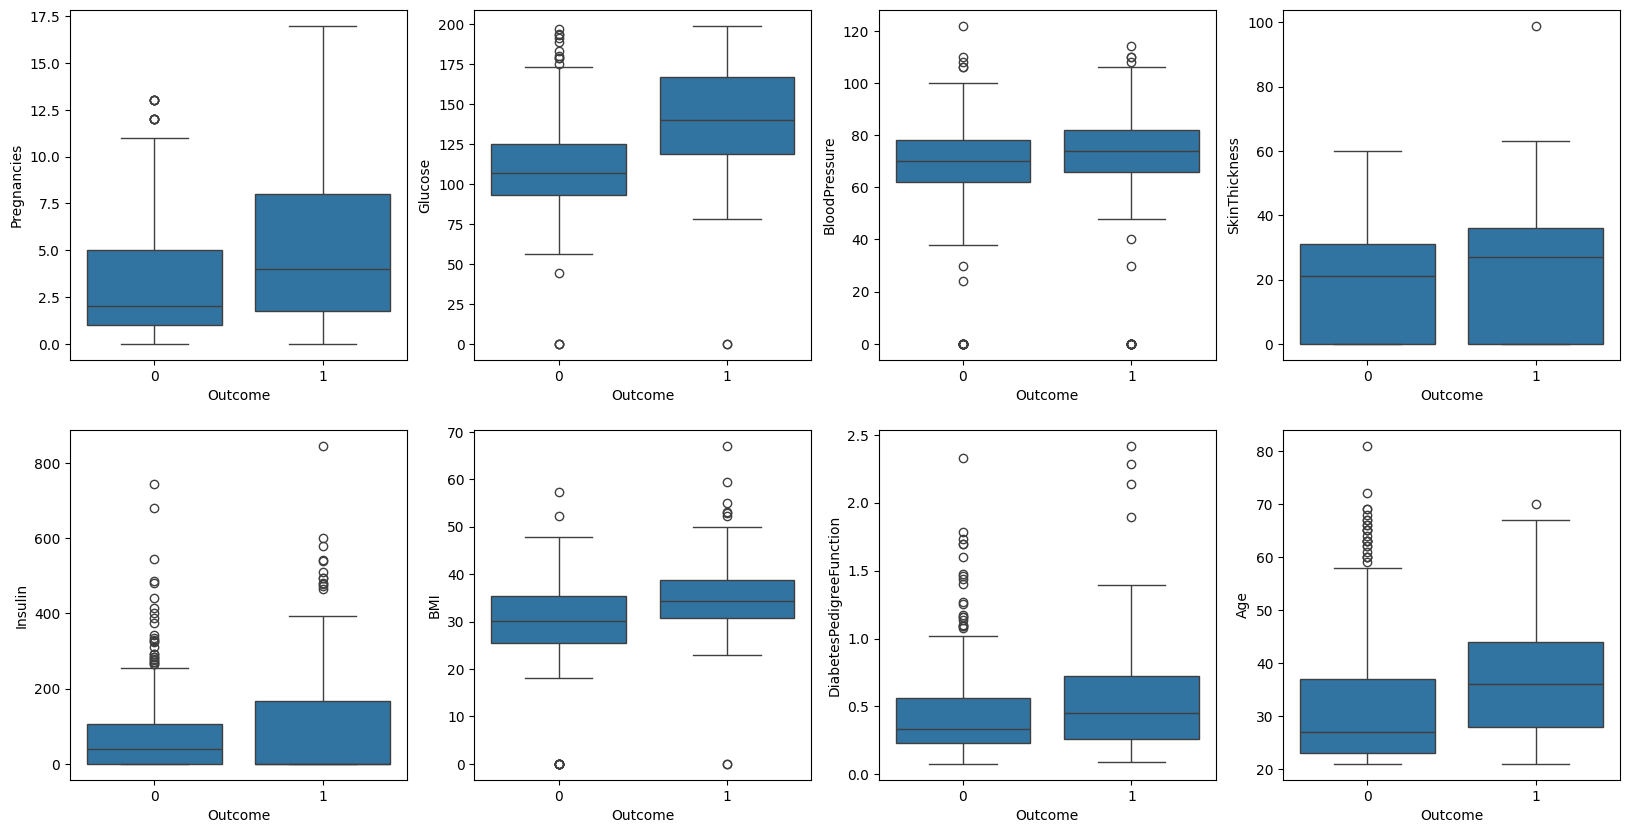

In [81]:
# Comparação por Categoria:
'''
    - A mediana de gravidezes é maior para pessoas que tem diabetes
    - A mediana de glicose é maior para pessoas que tem diabetes
    - Existem mais outliers em pressão sanguínea para pessoas que não tem diabetes 
      (mas talvez isso seja pelo fato do dataset esta desbalanceado)
    - A grossura da pele não muda muito entre as pessoas que têm e não têm diabetes
    - Pessoas que diabetes tem mais outliers em BMI
    - A mediana das pessoas que tem diabetes está entre 30 e 40 anos 
      (maior do que a mediana de idade das pessoas que não têm diabetes, que está entre 20 e 30)
'''

plt.figure(figsize=(20, 10))

numeric_variables = pima_df.select_dtypes(include=[np.number]).drop(columns='Outcome')

for index, var in enumerate(numeric_variables):
    plt.subplot(2, 4, index+1)
    sns.boxplot(x='Outcome', y=var, data=pima_df)

plt.show()

#### 1.6 Faixas de glicose

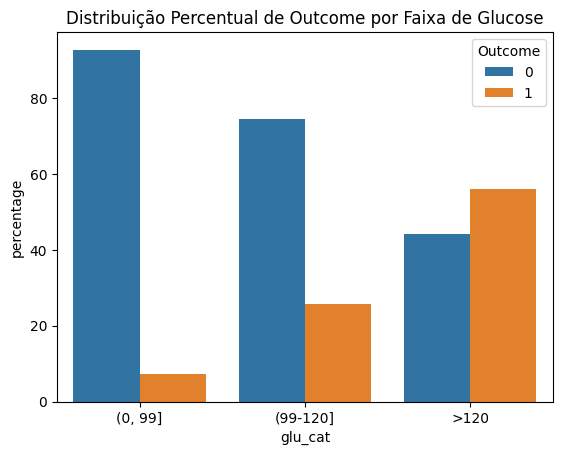

In [82]:
# Definição dos limites das categorias e dos rótulos:
'''
    - Como é possível ver, conforme vai aumentando a taxa de glicose, a porcentagem de pessoas que tem diabetes também aumenta
'''
bins = [0, 99, 120, float('inf')]
labels = ['(0, 99]', '(99-120]', '>120']

# Criação da coluna categórica:
pima_df['glu_cat'] = pd.cut(pima_df['Glucose'], bins=bins, labels=labels, right=True, ordered=True)

count = pima_df.groupby(['glu_cat', 'Outcome'], observed=False).size().reset_index(name='count')
total_by_cat = pima_df.groupby('glu_cat', observed=False).size().reset_index(name='total')
count = count.merge(total_by_cat, on='glu_cat')
count['percentage'] = count['count'] / count['total'] * 100

sns.barplot(data=count, x='glu_cat', y='percentage', hue='Outcome')
plt.title('Distribuição Percentual de Outcome por Faixa de Glucose')
plt.show()

## Parte 2 - Adult Income

In [86]:
adult_income_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

adult_income_df.columns = ["age","workclass","finalweight","education",
                 "education-num","martial-status","occupation",
                 "relationship","race","sex","capital-gain",
                 "capital-loss","hours-per-week ","native-country",
                 "income"]

for col in adult_income_df.columns:
    if adult_income_df[col].dtype == object:
        adult_income_df[col] = adult_income_df[col].str.strip()

In [120]:
# Calculando a tabela de contingência entre race e sex
contingency_table = pd.crosstab(adult_income_df['race'], adult_income_df['sex'], margins=True)


# Extraindo nomes das linhas e colunas
row_names = contingency_table.index
column_names = contingency_table.columns
expected_frequency_table = pd.DataFrame(index=row_names, columns=column_names)


for row in row_names:
    for column in column_names:
        expected_frequency_table.loc[row, column] = (contingency_table.loc[row, 'All'] * contingency_table.loc['All', column]) / contingency_table.loc['All', 'All']

display(contingency_table)
display(expected_frequency_table)

sex,Female,Male,All
race,,,
Amer-Indian-Eskimo,119,192,311
Asian-Pac-Islander,346,693,1039
Black,1555,1569,3124
Other,109,162,271
White,8642,19173,27815
All,10771,21789,32560


sex,Female,Male,All
race,,,
Amer-Indian-Eskimo,102.880252,208.119748,311.0
Asian-Pac-Islander,343.70605,695.29395,1039.0
Black,1033.433784,2090.566216,3124.0
Other,89.648065,181.351935,271.0
White,9201.331849,18613.668151,27815.0
All,10771.0,21789.0,32560.0
